In [9]:
import numpy as np
import matplotlib.pyplot as plt


### 1. Hyperparameters

In [10]:
# The size of the dataset
N = 100

# The order of polynomial function
M = 4


### 2. dataset generation

In [11]:
def generate_dataset(N):
    
    '''
    arguments로 주어진 N개 크기의 dataset을 만듭니다.

    arguments
    N: scalar, data point 갯수

    returns
    x: (N), input values
    y: (N), noiseless output values
    t: (N), target values

    '''

    # 0부터 0.3까지 N/2개, 0.7부터 1까지 N/2개의 값을 얻습니다.
    x = np.concatenate([np.linspace(0, 0.4, N//2), np.linspace(0.6, 1, N//2)])

    # sin(2πx)
    y = np.sin(2*np.pi*x)
    
    # Normal(mean=0, stddev=0.2) error term
    error = 0.2 * np.random.randn(N)
    t = y + error
    
    return x, y, t

x, y, t = generate_dataset(N)


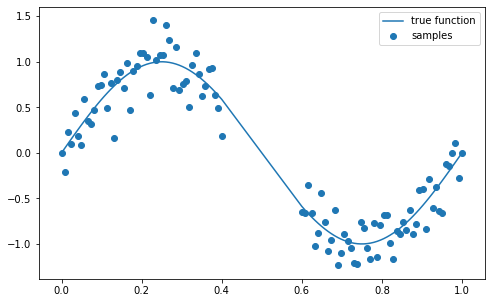

In [12]:
# Visualization
plt.figure(figsize=[8, 5])
plt.scatter(x, t, label='samples')
plt.plot(x, y, label='true function')
plt.legend()
plt.show()


### 3. Design Matrix



In [13]:
def generate_design_matrix(x, M):
    '''
    polynomial basis function을 적용한 design matrix를 만듭니다.

    arguments
    x: (N), input data
    M: scalar, the order of polynomial basis function

    returns
    Phi: (N, M), design matrix
    '''

    Phi = []
    for m in range(M):
        Phi.append(x ** m) # m-order polynomial
        
    # list to numpy array
    Phi = np.stack(Phi, axis=1)
    
    return Phi

# Design Matrix, shape : [N, M]
Phi = generate_design_matrix(x, M)


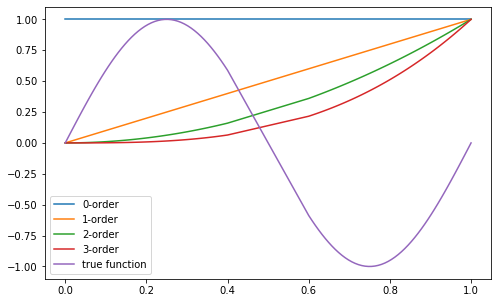

In [14]:
# Visualization
plt.figure(figsize=[8, 5])
plt.plot(x, Phi[:, 0], label='0-order')
plt.plot(x, Phi[:, 1], label='1-order')
plt.plot(x, Phi[:, 2], label='2-order')
plt.plot(x, Phi[:, 3], label='3-order')
plt.plot(x, y, label='true function')
plt.legend()
plt.show()


### 4. Find the weight and the precision that maximize likelihood of the data
$\mathbf{w}_{\mathrm{ML}}=\left(\mathbf{\Phi}^{\mathrm{T}} \mathbf{\Phi}\right)^{-1} \mathbf{\Phi}^{\mathrm{T}} \mathbf{t}$

$\frac{1}{\beta_{\mathrm{ML}}}=\frac{1}{N} \sum_{n=1}^{N}\left\{t_{n}-\mathbf{w}_{\mathrm{ML}}^{\mathrm{T}} \boldsymbol{\phi}\left(\mathbf{x}_{n}\right)\right\}^{2}$

In [15]:
w_ML = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ t
beta_ML = N / np.sum((t - Phi @ w_ML) ** 2)

print('w_ML :', w_ML)
print('beta_ML :', beta_ML)


w_ML : [ -0.18203777  11.71472322 -34.08334454  22.7110216 ]
beta_ML : 22.023702834183375


### 5. Prediction

In [16]:
x_new = np.linspace(-0.2, 1.2, 100)
Phi_new = generate_design_matrix(x_new, M)
predicted = Phi_new @ w_ML
stddev = (1 / beta_ML) ** 0.5


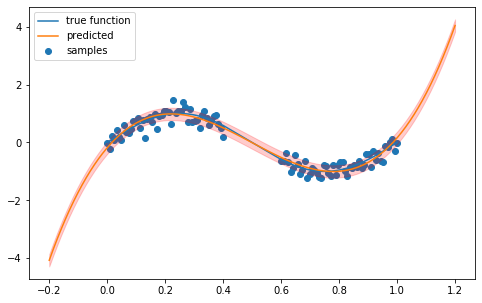

In [17]:
# Visualization
plt.figure(figsize=[8, 5])
plt.plot(x, y, label='true function')
plt.scatter(x, t, label='samples')
plt.plot(x_new, predicted, label='predicted')
plt.fill_between(x_new, predicted-stddev, predicted+stddev, color='red', alpha=0.2)
plt.legend()
plt.show()
